In [2]:
#connecting contents to google colab
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

#Setwd
os.chdir('/content/drive/MyDrive/Tcrdist3')

#get what's in the directory
contents = os.listdir()
print("Contents of the Google Drive directory:")
for item in contents:
    print(item)

Contents of the Google Drive directory:
raw_data.csv
dash_human.csv
dash_beta_airr.csv
project_one_work.ipynb
EBV_SARS_CoV_2_InfluenzaA_raw_data.csv
alphabeta_gammadelta_db.tsv
dense_array.csv
fa894700c172
ebv_sars_flu.gsheet
ebv_sars_flu - ebv_sars_flu.csv
distance_matrix.csv
project_two_work.ipynb
ebv_sars_cov_2_influenza_a_table.xlsx
ebv_sars_cov_2_influenza_a_table.csv
sparsed_matrix.npz
sparse_matrix.npz
ebv_cmv_sars_cov_2_table.gsheet
ebv_cmv_sars_cov_2_table.csv
sparse_matrix_cdr3_sequences.npz
project2_work.ipynb
ebv_cmv_sars_cov_2_full_table.gsheet
ebv_cmv_sars_cov_2_full_table - Sheet1.csv
project_2_sparse_matrix_heat_map.ipynb
cmv_ebv_sars_cov_2_complete_data.gsheet
cmv_ebv_sars_cov_2_complete_data.csv


In [ ]:
!pip install git+https://github.com/kmayerb/tcrdist3.git@0.2.2

  Cloning https://github.com/kmayerb/tcrdist3.git (to revision 0.2.2) to /tmp/pip-req-build-bbuxpd90
  Running command git clone --filter=blob:none --quiet https://github.com/kmayerb/tcrdist3.git /tmp/pip-req-build-bbuxpd90
  Running command git checkout -q 04b0b8c2573d04a9d2cb77f7a3aeeed3a0eab167
  Resolved https://github.com/kmayerb/tcrdist3.git to commit 04b0b8c2573d04a9d2cb77f7a3aeeed3a0eab167
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.4/366.4 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 478.0/478.0 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (se

In [ ]:
import os

#Setwd
os.chdir('/content/drive/MyDrive/Tcrdist3')

#get what's in the directory
contents = os.listdir()
print("Contents of the Google Drive directory:")
for item in contents:
    print(item)

Contents of the Google Drive directory:
raw_data.csv
dash_human.csv
dash_beta_airr.csv
project_one_work.ipynb
EBV_SARS_CoV_2_InfluenzaA_raw_data.csv
alphabeta_gammadelta_db.tsv
dense_array.csv
fa894700c172
ebv_sars_flu.gsheet
ebv_sars_flu - ebv_sars_flu.csv
distance_matrix.csv
project_two_work.ipynb
ebv_sars_cov_2_influenza_a_table.xlsx
ebv_sars_cov_2_influenza_a_table.csv
sparsed_matrix.npz
sparse_matrix.npz
project2_work.ipynb
project_2_work_and_data.ipynb
ebv_cmv_sars_cov_2_table.gsheet
ebv_cmv_sars_cov_2_table.csv


In [ ]:
import pandas as pd
#open tcrdist repertoire
from tcrdist.repertoire import TCRrep

#read .csv file needed to be utilized
df = pd.read_csv("ebv_cmv_sars_cov_2_table.csv")

#determine what is going to be computed from the data
tr = TCRrep(cell_df = df,
            organism = 'human',
            chains = ['beta'],
            db_file = 'alphabeta_gammadelta_db.tsv',
            compute_distances = False)

/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
/usr/local/lib/python3.10/dist-packages/tcrdist/repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [ ]:
#define the amount of CPU cores to carry out the computations
tr.cpus = 4

#define and compute the distances between the data
tr.compute_sparse_rect_distances(radius = 50, chunk_size = 50)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#check if the data has been calculated and converted into a sparse matrix
tr.rw_beta

<313x313 sparse matrix of type '<class 'numpy.int16'>'
	with 543 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy import sparse

#define what is the sparse matrix
sparse_matrix = tr.rw_beta

#save the sparse matrix as a .npz file
sparse.save_npz("sparse_matrix_cdr3_sequences", sparse_matrix)

#convert the .npz file to a dense array
dense_array_cdr3 = sparse_matrix.toarray()

print(dense_array_cdr3)

[[-1  0  0 ...  0  0  0]
 [ 0 -1 45 ...  0  0  0]
 [ 0 45 -1 ...  0  0  0]
 ...
 [ 0  0  0 ... -1  0  0]
 [ 0  0  0 ...  0 -1  0]
 [ 0  0  0 ...  0  0 -1]]


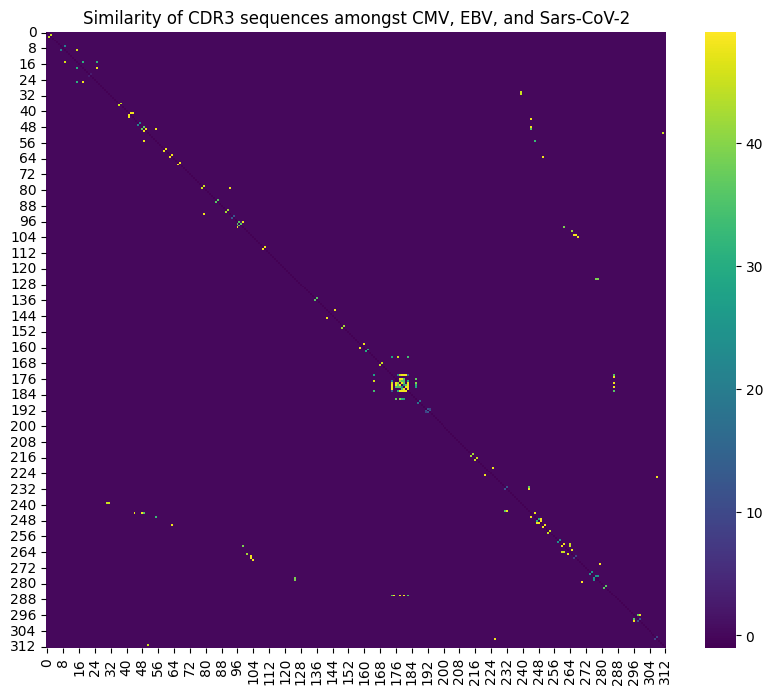

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sp

# Load the sparse matrix from the .npz file
sparse_matrix = sp.load_npz('sparse_matrix_cdr3_sequences.npz')

# Convert sparse matrix to a dense matrix
dense_matrix = sparse_matrix.toarray()

# Create heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(dense_matrix, cmap='viridis')

# Set labels and title
plt.title('Similarity of CDR3 sequences amongst CMV, EBV, and Sars-CoV-2')

# Show plot
plt.show()


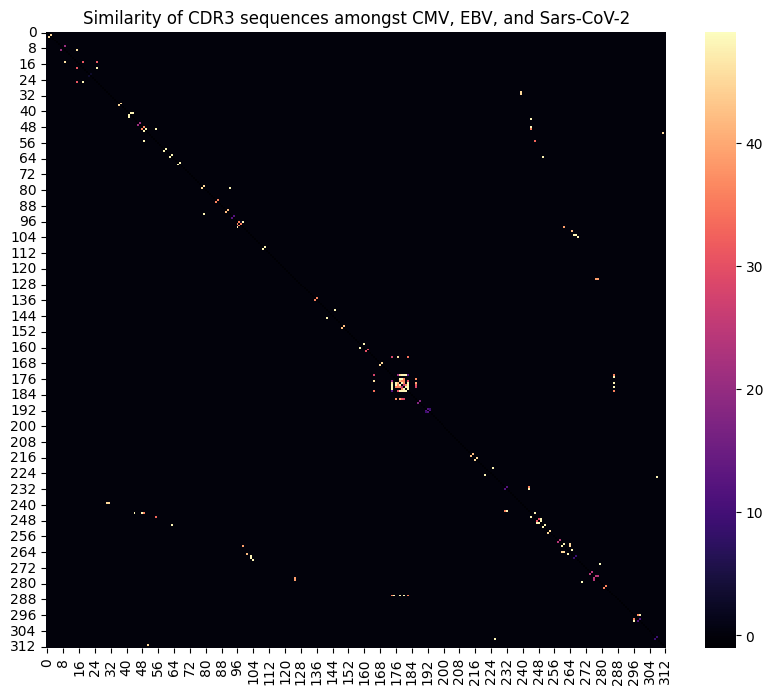

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sp

# Load the sparse matrix from the .npz file
sparse_matrix = sp.load_npz('sparse_matrix_cdr3_sequences.npz')

# Convert sparse matrix to a dense matrix
dense_matrix = sparse_matrix.toarray()

# Create heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(dense_matrix, cmap='magma')

# Set labels and title
plt.title('Similarity of CDR3 sequences amongst CMV, EBV, and Sars-CoV-2')

# Show plot
plt.show()